<div id="header" class="alert alert-block alert-info" style="text-align: center;">
  <h1><b>Final Project For Course 246502201 - מערכות מרובות סוכנים </b></h1>
  <table style="background-color: lightblue;text-align: center; font-size: 20px; width:80%;">
    <tr>
      <td><b>Emoji</b></td>  
      <td><b>Name</b></td>
      <td><b>ID</b></td>
    </tr>
    <tr>
      <td style="font-size: 30px;">&#129302;</td> 
      <td>Tali Presaizen</td>
      <td>304449226</td>
    </tr>
    <tr>
      <td style="font-size: 30px;">&#128586;</td>
      <td>Mor Atiya</td>
      <td>315444992</td>
    </tr>
  </table>
</div>

# Mountain Car Control Problem

The Mountain Car control problem is a classic reinforcement learning problem where an underpowered car must drive up a steep hill. The car needs to build up momentum by driving back and forth to reach the goal.

## Problem Description

The objective is to reach the flag positioned on top of the right hill as quickly as possible. The agent (car) must learn to move back and forth to build the necessary momentum.

### State Description: Observation Space

The observation is a `ndarray` with shape (2,) where the elements correspond to:

| Num | Observation                      | Min   | Max   | Unit        |
|-----|----------------------------------|-------|-------|-------------|
| 0   | Position of the car along x-axis | -1.2  | 0.6   | position (m) |
| 1   | Velocity of the car              | -0.07 | 0.07  | velocity (v) |

### Action Description: Action Space

There are 3 discrete deterministic actions:
- **0**: Accelerate to the left
- **1**: Don’t accelerate
- **2**: Accelerate to the right

### Transition Dynamics

Given an action, the mountain car follows these transition dynamics:
\[ \text{velocity}_{t+1} = \text{velocity}_t + (\text{action} - 1) \times \text{force} - \cos(3 \times \text{position}_t) \times \text{gravity} \]
\[ \text{position}_{t+1} = \text{position}_t + \text{velocity}_{t+1} \]

where \(\text{force} = 0.001\) and \(\text{gravity} = 0.0025\). Collisions at either end are inelastic, setting the velocity to 0 upon collision. Position is clipped to [-1.2, 0.6] and velocity to [-0.07, 0.07].

### Reward

The agent receives a reward of -1 for each time step until the goal position is reached.

### Starting State

The car's position is uniformly random in [-0.6, -0.4] and the starting velocity is 0.

### Episode End

An episode terminates when:
- The car's position is ≥ 0.5 (goal position).
- The episode length reaches 200.

## Objective

Develop a policy that enables the car to reach the goal position in the minimum number of time steps.



In [1]:
#!pip install gym==0.21.0

In [7]:
#pip install pyglet==1.5.11


     ---------------------------------------- 1.1/1.1 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: pyglet
    Found existing installation: pyglet 2.0.10
    Uninstalling pyglet-2.0.10:
      Successfully uninstalled pyglet-2.0.10


## Manually updating the Q value

The following code discretizes the continuous state space of the Mountain Car environment into a finite number of bins to create a Q-table. This allows the use of Q-learning to learn the optimal policy for driving the car up the hill. The Q-values are updated based on the rewards and future Q-values, and the epsilon-greedy policy balances exploration and exploitation.

In [8]:
import gym
import numpy as np

# Initialize the environment
env = gym.make("MountainCar-v0")
env.reset()

# Discretization parameters
DISCRETE_OBSERVATION_SPACE_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OBSERVATION_SPACE_SIZE

# Q-learning parameters
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 20000
epsilon = 0.5
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)

# Initialize Q-table
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OBSERVATION_SPACE_SIZE + [env.action_space.n]))

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int))

for ep in range(EPISODES):
    done = False
    discrete_state = get_discrete_state(env.reset())
    render = (ep % 500 == 0)

    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0, env.action_space.n)

        new_state, reward, done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_state)

        if render:
            env.render()

        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action, )] = new_q
        elif new_state[0] >= env.goal_position:
            print(f"Goal reached at episode {ep}")
            q_table[discrete_state + (action, )] = 0

        discrete_state = new_discrete_state

    if END_EPSILON_DECAYING >= ep >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

env.close()

C:\Users\tpres\anaconda3\envs\Lunar_SPAQL\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Goal reached at episode 720
Goal reached at episode 1212
Goal reached at episode 1265
Goal reached at episode 1330
Goal reached at episode 1350
Goal reached at episode 1353
Goal reached at episode 1379
Goal reached at episode 1407
Goal reached at episode 1456
Goal reached at episode 1498
Goal reached at episode 1500
Goal reached at episode 1504
Goal reached at episode 1522
Goal reached at episode 1544
Goal reached at episode 1644
Goal reached at episode 1648
Goal reached at episode 1649
Goal reached at episode 1673
Goal reached at episode 1693
Goal reached at episode 1746
Goal reached at episode 1747
Goal reached at episode 1886
Goal reached at episode 1962
Goal reached at episode 1984
Goal reached at episode 1998
Goal reached at episode 2004
Goal reached at episode 2007
Goal reached at episode 2012
Goal reached at episode 2013
Goal reached at episode 2018
Goal reached at episode 2019
Goal reached at episode 2055
Goal reached at episode 2117
Goal reached at episode 2137
Goal reached at

Goal reached at episode 4143
Goal reached at episode 4146
Goal reached at episode 4147
Goal reached at episode 4157
Goal reached at episode 4158
Goal reached at episode 4162
Goal reached at episode 4165
Goal reached at episode 4166
Goal reached at episode 4169
Goal reached at episode 4170
Goal reached at episode 4188
Goal reached at episode 4189
Goal reached at episode 4190
Goal reached at episode 4195
Goal reached at episode 4196
Goal reached at episode 4203
Goal reached at episode 4204
Goal reached at episode 4207
Goal reached at episode 4210
Goal reached at episode 4220
Goal reached at episode 4222
Goal reached at episode 4228
Goal reached at episode 4252
Goal reached at episode 4267
Goal reached at episode 4327
Goal reached at episode 4351
Goal reached at episode 4359
Goal reached at episode 4361
Goal reached at episode 4362
Goal reached at episode 4364
Goal reached at episode 4365
Goal reached at episode 4366
Goal reached at episode 4369
Goal reached at episode 4370
Goal reached a

Goal reached at episode 5004
Goal reached at episode 5005
Goal reached at episode 5006
Goal reached at episode 5008
Goal reached at episode 5009
Goal reached at episode 5012
Goal reached at episode 5015
Goal reached at episode 5016
Goal reached at episode 5017
Goal reached at episode 5020
Goal reached at episode 5021
Goal reached at episode 5022
Goal reached at episode 5025
Goal reached at episode 5029
Goal reached at episode 5030
Goal reached at episode 5032
Goal reached at episode 5035
Goal reached at episode 5036
Goal reached at episode 5038
Goal reached at episode 5039
Goal reached at episode 5042
Goal reached at episode 5043
Goal reached at episode 5045
Goal reached at episode 5051
Goal reached at episode 5052
Goal reached at episode 5054
Goal reached at episode 5055
Goal reached at episode 5058
Goal reached at episode 5060
Goal reached at episode 5062
Goal reached at episode 5065
Goal reached at episode 5066
Goal reached at episode 5068
Goal reached at episode 5069
Goal reached a

Goal reached at episode 5597
Goal reached at episode 5599
Goal reached at episode 5600
Goal reached at episode 5601
Goal reached at episode 5602
Goal reached at episode 5603
Goal reached at episode 5604
Goal reached at episode 5605
Goal reached at episode 5606
Goal reached at episode 5607
Goal reached at episode 5608
Goal reached at episode 5609
Goal reached at episode 5610
Goal reached at episode 5611
Goal reached at episode 5612
Goal reached at episode 5615
Goal reached at episode 5616
Goal reached at episode 5617
Goal reached at episode 5618
Goal reached at episode 5619
Goal reached at episode 5620
Goal reached at episode 5623
Goal reached at episode 5624
Goal reached at episode 5626
Goal reached at episode 5627
Goal reached at episode 5628
Goal reached at episode 5629
Goal reached at episode 5630
Goal reached at episode 5631
Goal reached at episode 5632
Goal reached at episode 5633
Goal reached at episode 5634
Goal reached at episode 5639
Goal reached at episode 5641
Goal reached a

Goal reached at episode 6026
Goal reached at episode 6030
Goal reached at episode 6036
Goal reached at episode 6046
Goal reached at episode 6048
Goal reached at episode 6051
Goal reached at episode 6052
Goal reached at episode 6054
Goal reached at episode 6058
Goal reached at episode 6059
Goal reached at episode 6060
Goal reached at episode 6063
Goal reached at episode 6064
Goal reached at episode 6065
Goal reached at episode 6066
Goal reached at episode 6067
Goal reached at episode 6068
Goal reached at episode 6070
Goal reached at episode 6071
Goal reached at episode 6072
Goal reached at episode 6073
Goal reached at episode 6074
Goal reached at episode 6075
Goal reached at episode 6076
Goal reached at episode 6077
Goal reached at episode 6078
Goal reached at episode 6079
Goal reached at episode 6082
Goal reached at episode 6085
Goal reached at episode 6087
Goal reached at episode 6089
Goal reached at episode 6090
Goal reached at episode 6092
Goal reached at episode 6093
Goal reached a

Goal reached at episode 6728
Goal reached at episode 6729
Goal reached at episode 6730
Goal reached at episode 6731
Goal reached at episode 6734
Goal reached at episode 6735
Goal reached at episode 6739
Goal reached at episode 6740
Goal reached at episode 6742
Goal reached at episode 6743
Goal reached at episode 6747
Goal reached at episode 6751
Goal reached at episode 6754
Goal reached at episode 6765
Goal reached at episode 6773
Goal reached at episode 6774
Goal reached at episode 6780
Goal reached at episode 6787
Goal reached at episode 6792
Goal reached at episode 6795
Goal reached at episode 6796
Goal reached at episode 6798
Goal reached at episode 6799
Goal reached at episode 6832
Goal reached at episode 6836
Goal reached at episode 6837
Goal reached at episode 6838
Goal reached at episode 6840
Goal reached at episode 6845
Goal reached at episode 6846
Goal reached at episode 6847
Goal reached at episode 6848
Goal reached at episode 6849
Goal reached at episode 6850
Goal reached a

Goal reached at episode 7226
Goal reached at episode 7227
Goal reached at episode 7228
Goal reached at episode 7229
Goal reached at episode 7230
Goal reached at episode 7231
Goal reached at episode 7232
Goal reached at episode 7233
Goal reached at episode 7234
Goal reached at episode 7235
Goal reached at episode 7236
Goal reached at episode 7237
Goal reached at episode 7238
Goal reached at episode 7241
Goal reached at episode 7242
Goal reached at episode 7243
Goal reached at episode 7245
Goal reached at episode 7246
Goal reached at episode 7247
Goal reached at episode 7248
Goal reached at episode 7250
Goal reached at episode 7251
Goal reached at episode 7252
Goal reached at episode 7253
Goal reached at episode 7254
Goal reached at episode 7255
Goal reached at episode 7256
Goal reached at episode 7257
Goal reached at episode 7258
Goal reached at episode 7259
Goal reached at episode 7260
Goal reached at episode 7261
Goal reached at episode 7262
Goal reached at episode 7263
Goal reached a

Goal reached at episode 7617
Goal reached at episode 7618
Goal reached at episode 7619
Goal reached at episode 7620
Goal reached at episode 7621
Goal reached at episode 7622
Goal reached at episode 7623
Goal reached at episode 7624
Goal reached at episode 7625
Goal reached at episode 7626
Goal reached at episode 7627
Goal reached at episode 7628
Goal reached at episode 7629
Goal reached at episode 7630
Goal reached at episode 7631
Goal reached at episode 7632
Goal reached at episode 7633
Goal reached at episode 7635
Goal reached at episode 7636
Goal reached at episode 7637
Goal reached at episode 7638
Goal reached at episode 7639
Goal reached at episode 7640
Goal reached at episode 7641
Goal reached at episode 7642
Goal reached at episode 7643
Goal reached at episode 7644
Goal reached at episode 7645
Goal reached at episode 7646
Goal reached at episode 7648
Goal reached at episode 7649
Goal reached at episode 7650
Goal reached at episode 7651
Goal reached at episode 7652
Goal reached a

Goal reached at episode 8016
Goal reached at episode 8020
Goal reached at episode 8021
Goal reached at episode 8022
Goal reached at episode 8023
Goal reached at episode 8024
Goal reached at episode 8025
Goal reached at episode 8027
Goal reached at episode 8028
Goal reached at episode 8031
Goal reached at episode 8032
Goal reached at episode 8033
Goal reached at episode 8034
Goal reached at episode 8035
Goal reached at episode 8036
Goal reached at episode 8037
Goal reached at episode 8038
Goal reached at episode 8040
Goal reached at episode 8041
Goal reached at episode 8045
Goal reached at episode 8046
Goal reached at episode 8047
Goal reached at episode 8048
Goal reached at episode 8049
Goal reached at episode 8050
Goal reached at episode 8051
Goal reached at episode 8052
Goal reached at episode 8053
Goal reached at episode 8054
Goal reached at episode 8055
Goal reached at episode 8056
Goal reached at episode 8057
Goal reached at episode 8058
Goal reached at episode 8059
Goal reached a

Goal reached at episode 8395
Goal reached at episode 8396
Goal reached at episode 8397
Goal reached at episode 8398
Goal reached at episode 8399
Goal reached at episode 8402
Goal reached at episode 8403
Goal reached at episode 8404
Goal reached at episode 8405
Goal reached at episode 8406
Goal reached at episode 8407
Goal reached at episode 8408
Goal reached at episode 8409
Goal reached at episode 8410
Goal reached at episode 8411
Goal reached at episode 8412
Goal reached at episode 8413
Goal reached at episode 8414
Goal reached at episode 8415
Goal reached at episode 8416
Goal reached at episode 8417
Goal reached at episode 8420
Goal reached at episode 8422
Goal reached at episode 8424
Goal reached at episode 8425
Goal reached at episode 8426
Goal reached at episode 8427
Goal reached at episode 8428
Goal reached at episode 8429
Goal reached at episode 8430
Goal reached at episode 8431
Goal reached at episode 8432
Goal reached at episode 8433
Goal reached at episode 8434
Goal reached a

Goal reached at episode 8716
Goal reached at episode 8717
Goal reached at episode 8718
Goal reached at episode 8719
Goal reached at episode 8720
Goal reached at episode 8721
Goal reached at episode 8722
Goal reached at episode 8723
Goal reached at episode 8724
Goal reached at episode 8725
Goal reached at episode 8726
Goal reached at episode 8727
Goal reached at episode 8728
Goal reached at episode 8729
Goal reached at episode 8730
Goal reached at episode 8731
Goal reached at episode 8732
Goal reached at episode 8733
Goal reached at episode 8735
Goal reached at episode 8736
Goal reached at episode 8738
Goal reached at episode 8743
Goal reached at episode 8744
Goal reached at episode 8745
Goal reached at episode 8746
Goal reached at episode 8747
Goal reached at episode 8748
Goal reached at episode 8749
Goal reached at episode 8750
Goal reached at episode 8751
Goal reached at episode 8752
Goal reached at episode 8753
Goal reached at episode 8756
Goal reached at episode 8757
Goal reached a

Goal reached at episode 9036
Goal reached at episode 9037
Goal reached at episode 9038
Goal reached at episode 9039
Goal reached at episode 9040
Goal reached at episode 9041
Goal reached at episode 9042
Goal reached at episode 9043
Goal reached at episode 9044
Goal reached at episode 9045
Goal reached at episode 9046
Goal reached at episode 9047
Goal reached at episode 9048
Goal reached at episode 9049
Goal reached at episode 9050
Goal reached at episode 9051
Goal reached at episode 9052
Goal reached at episode 9053
Goal reached at episode 9054
Goal reached at episode 9055
Goal reached at episode 9056
Goal reached at episode 9057
Goal reached at episode 9058
Goal reached at episode 9059
Goal reached at episode 9060
Goal reached at episode 9061
Goal reached at episode 9062
Goal reached at episode 9063
Goal reached at episode 9064
Goal reached at episode 9065
Goal reached at episode 9066
Goal reached at episode 9067
Goal reached at episode 9068
Goal reached at episode 9069
Goal reached a

Goal reached at episode 9383
Goal reached at episode 9384
Goal reached at episode 9385
Goal reached at episode 9387
Goal reached at episode 9388
Goal reached at episode 9389
Goal reached at episode 9390
Goal reached at episode 9391
Goal reached at episode 9392
Goal reached at episode 9393
Goal reached at episode 9394
Goal reached at episode 9395
Goal reached at episode 9396
Goal reached at episode 9397
Goal reached at episode 9398
Goal reached at episode 9399
Goal reached at episode 9400
Goal reached at episode 9401
Goal reached at episode 9402
Goal reached at episode 9403
Goal reached at episode 9404
Goal reached at episode 9405
Goal reached at episode 9406
Goal reached at episode 9407
Goal reached at episode 9408
Goal reached at episode 9409
Goal reached at episode 9410
Goal reached at episode 9411
Goal reached at episode 9412
Goal reached at episode 9413
Goal reached at episode 9414
Goal reached at episode 9415
Goal reached at episode 9416
Goal reached at episode 9417
Goal reached a

Goal reached at episode 9690
Goal reached at episode 9691
Goal reached at episode 9692
Goal reached at episode 9693
Goal reached at episode 9694
Goal reached at episode 9695
Goal reached at episode 9696
Goal reached at episode 9697
Goal reached at episode 9698
Goal reached at episode 9699
Goal reached at episode 9700
Goal reached at episode 9701
Goal reached at episode 9702
Goal reached at episode 9703
Goal reached at episode 9704
Goal reached at episode 9705
Goal reached at episode 9706
Goal reached at episode 9707
Goal reached at episode 9708
Goal reached at episode 9709
Goal reached at episode 9710
Goal reached at episode 9711
Goal reached at episode 9712
Goal reached at episode 9713
Goal reached at episode 9714
Goal reached at episode 9715
Goal reached at episode 9716
Goal reached at episode 9717
Goal reached at episode 9718
Goal reached at episode 9719
Goal reached at episode 9720
Goal reached at episode 9721
Goal reached at episode 9722
Goal reached at episode 9723
Goal reached a

Goal reached at episode 9990
Goal reached at episode 9991
Goal reached at episode 9992
Goal reached at episode 9993
Goal reached at episode 9994
Goal reached at episode 9995
Goal reached at episode 9996
Goal reached at episode 9997
Goal reached at episode 9998
Goal reached at episode 9999
Goal reached at episode 10000
Goal reached at episode 10001
Goal reached at episode 10002
Goal reached at episode 10003
Goal reached at episode 10004
Goal reached at episode 10005
Goal reached at episode 10006
Goal reached at episode 10007
Goal reached at episode 10008
Goal reached at episode 10009
Goal reached at episode 10010
Goal reached at episode 10011
Goal reached at episode 10012
Goal reached at episode 10013
Goal reached at episode 10014
Goal reached at episode 10015
Goal reached at episode 10016
Goal reached at episode 10017
Goal reached at episode 10018
Goal reached at episode 10019
Goal reached at episode 10020
Goal reached at episode 10021
Goal reached at episode 10022
Goal reached at epis

Goal reached at episode 10283
Goal reached at episode 10284
Goal reached at episode 10285
Goal reached at episode 10286
Goal reached at episode 10287
Goal reached at episode 10288
Goal reached at episode 10289
Goal reached at episode 10290
Goal reached at episode 10291
Goal reached at episode 10292
Goal reached at episode 10293
Goal reached at episode 10294
Goal reached at episode 10295
Goal reached at episode 10296
Goal reached at episode 10297
Goal reached at episode 10298
Goal reached at episode 10299
Goal reached at episode 10300
Goal reached at episode 10301
Goal reached at episode 10302
Goal reached at episode 10303
Goal reached at episode 10304
Goal reached at episode 10305
Goal reached at episode 10306
Goal reached at episode 10307
Goal reached at episode 10308
Goal reached at episode 10309
Goal reached at episode 10310
Goal reached at episode 10311
Goal reached at episode 10312
Goal reached at episode 10313
Goal reached at episode 10314
Goal reached at episode 10315
Goal reach

Goal reached at episode 10568
Goal reached at episode 10569
Goal reached at episode 10570
Goal reached at episode 10571
Goal reached at episode 10572
Goal reached at episode 10573
Goal reached at episode 10574
Goal reached at episode 10575
Goal reached at episode 10576
Goal reached at episode 10577
Goal reached at episode 10578
Goal reached at episode 10579
Goal reached at episode 10580
Goal reached at episode 10581
Goal reached at episode 10582
Goal reached at episode 10583
Goal reached at episode 10584
Goal reached at episode 10585
Goal reached at episode 10586
Goal reached at episode 10587
Goal reached at episode 10588
Goal reached at episode 10589
Goal reached at episode 10590
Goal reached at episode 10591
Goal reached at episode 10592
Goal reached at episode 10593
Goal reached at episode 10594
Goal reached at episode 10595
Goal reached at episode 10596
Goal reached at episode 10597
Goal reached at episode 10598
Goal reached at episode 10599
Goal reached at episode 10600
Goal reach

Goal reached at episode 10871
Goal reached at episode 10872
Goal reached at episode 10873
Goal reached at episode 10874
Goal reached at episode 10875
Goal reached at episode 10876
Goal reached at episode 10877
Goal reached at episode 10878
Goal reached at episode 10879
Goal reached at episode 10880
Goal reached at episode 10881
Goal reached at episode 10882
Goal reached at episode 10883
Goal reached at episode 10884
Goal reached at episode 10885
Goal reached at episode 10886
Goal reached at episode 10888
Goal reached at episode 10892
Goal reached at episode 10893
Goal reached at episode 10894
Goal reached at episode 10895
Goal reached at episode 10897
Goal reached at episode 10898
Goal reached at episode 10905
Goal reached at episode 10913
Goal reached at episode 10914
Goal reached at episode 10916
Goal reached at episode 10917
Goal reached at episode 10918
Goal reached at episode 10919
Goal reached at episode 10920
Goal reached at episode 10921
Goal reached at episode 10922
Goal reach

Goal reached at episode 11222
Goal reached at episode 11223
Goal reached at episode 11224
Goal reached at episode 11225
Goal reached at episode 11226
Goal reached at episode 11227
Goal reached at episode 11228
Goal reached at episode 11229
Goal reached at episode 11230
Goal reached at episode 11231
Goal reached at episode 11232
Goal reached at episode 11233
Goal reached at episode 11234
Goal reached at episode 11235
Goal reached at episode 11236
Goal reached at episode 11237
Goal reached at episode 11238
Goal reached at episode 11239
Goal reached at episode 11240
Goal reached at episode 11241
Goal reached at episode 11242
Goal reached at episode 11243
Goal reached at episode 11244
Goal reached at episode 11245
Goal reached at episode 11246
Goal reached at episode 11247
Goal reached at episode 11248
Goal reached at episode 11249
Goal reached at episode 11250
Goal reached at episode 11251
Goal reached at episode 11252
Goal reached at episode 11253
Goal reached at episode 11254
Goal reach

Goal reached at episode 11517
Goal reached at episode 11518
Goal reached at episode 11519
Goal reached at episode 11520
Goal reached at episode 11521
Goal reached at episode 11522
Goal reached at episode 11523
Goal reached at episode 11524
Goal reached at episode 11525
Goal reached at episode 11526
Goal reached at episode 11527
Goal reached at episode 11528
Goal reached at episode 11529
Goal reached at episode 11530
Goal reached at episode 11531
Goal reached at episode 11532
Goal reached at episode 11533
Goal reached at episode 11534
Goal reached at episode 11535
Goal reached at episode 11536
Goal reached at episode 11537
Goal reached at episode 11538
Goal reached at episode 11539
Goal reached at episode 11540
Goal reached at episode 11541
Goal reached at episode 11542
Goal reached at episode 11543
Goal reached at episode 11544
Goal reached at episode 11545
Goal reached at episode 11546
Goal reached at episode 11547
Goal reached at episode 11548
Goal reached at episode 11549
Goal reach

Goal reached at episode 11810
Goal reached at episode 11811
Goal reached at episode 11812
Goal reached at episode 11813
Goal reached at episode 11814
Goal reached at episode 11815
Goal reached at episode 11816
Goal reached at episode 11817
Goal reached at episode 11818
Goal reached at episode 11819
Goal reached at episode 11820
Goal reached at episode 11821
Goal reached at episode 11822
Goal reached at episode 11823
Goal reached at episode 11824
Goal reached at episode 11825
Goal reached at episode 11826
Goal reached at episode 11827
Goal reached at episode 11828
Goal reached at episode 11829
Goal reached at episode 11830
Goal reached at episode 11831
Goal reached at episode 11832
Goal reached at episode 11833
Goal reached at episode 11834
Goal reached at episode 11835
Goal reached at episode 11836
Goal reached at episode 11837
Goal reached at episode 11838
Goal reached at episode 11839
Goal reached at episode 11840
Goal reached at episode 11841
Goal reached at episode 11842
Goal reach

Goal reached at episode 12103
Goal reached at episode 12104
Goal reached at episode 12105
Goal reached at episode 12106
Goal reached at episode 12107
Goal reached at episode 12108
Goal reached at episode 12109
Goal reached at episode 12110
Goal reached at episode 12111
Goal reached at episode 12112
Goal reached at episode 12113
Goal reached at episode 12114
Goal reached at episode 12115
Goal reached at episode 12116
Goal reached at episode 12117
Goal reached at episode 12118
Goal reached at episode 12119
Goal reached at episode 12120
Goal reached at episode 12121
Goal reached at episode 12122
Goal reached at episode 12123
Goal reached at episode 12124
Goal reached at episode 12125
Goal reached at episode 12126
Goal reached at episode 12127
Goal reached at episode 12128
Goal reached at episode 12129
Goal reached at episode 12130
Goal reached at episode 12131
Goal reached at episode 12132
Goal reached at episode 12133
Goal reached at episode 12134
Goal reached at episode 12135
Goal reach

Goal reached at episode 12378
Goal reached at episode 12379
Goal reached at episode 12380
Goal reached at episode 12381
Goal reached at episode 12382
Goal reached at episode 12383
Goal reached at episode 12384
Goal reached at episode 12385
Goal reached at episode 12386
Goal reached at episode 12387
Goal reached at episode 12388
Goal reached at episode 12389
Goal reached at episode 12390
Goal reached at episode 12391
Goal reached at episode 12392
Goal reached at episode 12393
Goal reached at episode 12394
Goal reached at episode 12395
Goal reached at episode 12396
Goal reached at episode 12397
Goal reached at episode 12398
Goal reached at episode 12399
Goal reached at episode 12400
Goal reached at episode 12401
Goal reached at episode 12402
Goal reached at episode 12403
Goal reached at episode 12404
Goal reached at episode 12405
Goal reached at episode 12406
Goal reached at episode 12407
Goal reached at episode 12408
Goal reached at episode 12409
Goal reached at episode 12410
Goal reach

Goal reached at episode 12685
Goal reached at episode 12686
Goal reached at episode 12687
Goal reached at episode 12688
Goal reached at episode 12689
Goal reached at episode 12690
Goal reached at episode 12691
Goal reached at episode 12692
Goal reached at episode 12693
Goal reached at episode 12694
Goal reached at episode 12695
Goal reached at episode 12696
Goal reached at episode 12697
Goal reached at episode 12698
Goal reached at episode 12699
Goal reached at episode 12700
Goal reached at episode 12701
Goal reached at episode 12702
Goal reached at episode 12703
Goal reached at episode 12704
Goal reached at episode 12705
Goal reached at episode 12706
Goal reached at episode 12707
Goal reached at episode 12708
Goal reached at episode 12709
Goal reached at episode 12710
Goal reached at episode 12711
Goal reached at episode 12712
Goal reached at episode 12713
Goal reached at episode 12714
Goal reached at episode 12715
Goal reached at episode 12716
Goal reached at episode 12717
Goal reach

Goal reached at episode 12975
Goal reached at episode 12976
Goal reached at episode 12977
Goal reached at episode 12978
Goal reached at episode 12979
Goal reached at episode 12980
Goal reached at episode 12981
Goal reached at episode 12982
Goal reached at episode 12983
Goal reached at episode 12984
Goal reached at episode 12985
Goal reached at episode 12986
Goal reached at episode 12987
Goal reached at episode 12988
Goal reached at episode 12989
Goal reached at episode 12990
Goal reached at episode 12993
Goal reached at episode 12994
Goal reached at episode 12995
Goal reached at episode 12996
Goal reached at episode 12997
Goal reached at episode 12998
Goal reached at episode 12999
Goal reached at episode 13000
Goal reached at episode 13001
Goal reached at episode 13002
Goal reached at episode 13003
Goal reached at episode 13004
Goal reached at episode 13005
Goal reached at episode 13006
Goal reached at episode 13007
Goal reached at episode 13008
Goal reached at episode 13009
Goal reach

Goal reached at episode 13259
Goal reached at episode 13260
Goal reached at episode 13261
Goal reached at episode 13262
Goal reached at episode 13263
Goal reached at episode 13265
Goal reached at episode 13266
Goal reached at episode 13268
Goal reached at episode 13269
Goal reached at episode 13270
Goal reached at episode 13271
Goal reached at episode 13272
Goal reached at episode 13273
Goal reached at episode 13274
Goal reached at episode 13275
Goal reached at episode 13276
Goal reached at episode 13277
Goal reached at episode 13278
Goal reached at episode 13279
Goal reached at episode 13283
Goal reached at episode 13284
Goal reached at episode 13285
Goal reached at episode 13286
Goal reached at episode 13287
Goal reached at episode 13289
Goal reached at episode 13290
Goal reached at episode 13291
Goal reached at episode 13292
Goal reached at episode 13293
Goal reached at episode 13294
Goal reached at episode 13295
Goal reached at episode 13296
Goal reached at episode 13297
Goal reach

Goal reached at episode 13561
Goal reached at episode 13562
Goal reached at episode 13563
Goal reached at episode 13564
Goal reached at episode 13565
Goal reached at episode 13566
Goal reached at episode 13567
Goal reached at episode 13568
Goal reached at episode 13569
Goal reached at episode 13570
Goal reached at episode 13571
Goal reached at episode 13572
Goal reached at episode 13573
Goal reached at episode 13574
Goal reached at episode 13575
Goal reached at episode 13576
Goal reached at episode 13577
Goal reached at episode 13578
Goal reached at episode 13579
Goal reached at episode 13580
Goal reached at episode 13581
Goal reached at episode 13582
Goal reached at episode 13583
Goal reached at episode 13584
Goal reached at episode 13585
Goal reached at episode 13586
Goal reached at episode 13587
Goal reached at episode 13588
Goal reached at episode 13589
Goal reached at episode 13590
Goal reached at episode 13591
Goal reached at episode 13592
Goal reached at episode 13593
Goal reach

Goal reached at episode 13851
Goal reached at episode 13852
Goal reached at episode 13853
Goal reached at episode 13854
Goal reached at episode 13855
Goal reached at episode 13856
Goal reached at episode 13857
Goal reached at episode 13858
Goal reached at episode 13859
Goal reached at episode 13860
Goal reached at episode 13861
Goal reached at episode 13862
Goal reached at episode 13863
Goal reached at episode 13864
Goal reached at episode 13865
Goal reached at episode 13866
Goal reached at episode 13867
Goal reached at episode 13868
Goal reached at episode 13869
Goal reached at episode 13870
Goal reached at episode 13871
Goal reached at episode 13872
Goal reached at episode 13873
Goal reached at episode 13874
Goal reached at episode 13875
Goal reached at episode 13876
Goal reached at episode 13877
Goal reached at episode 13878
Goal reached at episode 13879
Goal reached at episode 13880
Goal reached at episode 13881
Goal reached at episode 13882
Goal reached at episode 13883
Goal reach

Goal reached at episode 14130
Goal reached at episode 14131
Goal reached at episode 14132
Goal reached at episode 14133
Goal reached at episode 14134
Goal reached at episode 14135
Goal reached at episode 14136
Goal reached at episode 14137
Goal reached at episode 14138
Goal reached at episode 14139
Goal reached at episode 14141
Goal reached at episode 14142
Goal reached at episode 14143
Goal reached at episode 14144
Goal reached at episode 14146
Goal reached at episode 14147
Goal reached at episode 14148
Goal reached at episode 14149
Goal reached at episode 14150
Goal reached at episode 14151
Goal reached at episode 14152
Goal reached at episode 14153
Goal reached at episode 14154
Goal reached at episode 14155
Goal reached at episode 14156
Goal reached at episode 14157
Goal reached at episode 14158
Goal reached at episode 14159
Goal reached at episode 14160
Goal reached at episode 14161
Goal reached at episode 14162
Goal reached at episode 14163
Goal reached at episode 14164
Goal reach

Goal reached at episode 14439
Goal reached at episode 14440
Goal reached at episode 14441
Goal reached at episode 14442
Goal reached at episode 14443
Goal reached at episode 14444
Goal reached at episode 14445
Goal reached at episode 14447
Goal reached at episode 14448
Goal reached at episode 14449
Goal reached at episode 14450
Goal reached at episode 14451
Goal reached at episode 14452
Goal reached at episode 14453
Goal reached at episode 14454
Goal reached at episode 14455
Goal reached at episode 14456
Goal reached at episode 14458
Goal reached at episode 14459
Goal reached at episode 14462
Goal reached at episode 14463
Goal reached at episode 14464
Goal reached at episode 14465
Goal reached at episode 14467
Goal reached at episode 14468
Goal reached at episode 14469
Goal reached at episode 14470
Goal reached at episode 14471
Goal reached at episode 14472
Goal reached at episode 14473
Goal reached at episode 14474
Goal reached at episode 14475
Goal reached at episode 14476
Goal reach

Goal reached at episode 14773
Goal reached at episode 14774
Goal reached at episode 14775
Goal reached at episode 14776
Goal reached at episode 14777
Goal reached at episode 14778
Goal reached at episode 14779
Goal reached at episode 14780
Goal reached at episode 14781
Goal reached at episode 14782
Goal reached at episode 14783
Goal reached at episode 14784
Goal reached at episode 14785
Goal reached at episode 14786
Goal reached at episode 14787
Goal reached at episode 14788
Goal reached at episode 14789
Goal reached at episode 14790
Goal reached at episode 14791
Goal reached at episode 14792
Goal reached at episode 14793
Goal reached at episode 14794
Goal reached at episode 14795
Goal reached at episode 14796
Goal reached at episode 14797
Goal reached at episode 14798
Goal reached at episode 14799
Goal reached at episode 14800
Goal reached at episode 14801
Goal reached at episode 14802
Goal reached at episode 14803
Goal reached at episode 14804
Goal reached at episode 14805
Goal reach

Goal reached at episode 15053
Goal reached at episode 15054
Goal reached at episode 15055
Goal reached at episode 15056
Goal reached at episode 15057
Goal reached at episode 15058
Goal reached at episode 15059
Goal reached at episode 15060
Goal reached at episode 15061
Goal reached at episode 15062
Goal reached at episode 15063
Goal reached at episode 15064
Goal reached at episode 15065
Goal reached at episode 15066
Goal reached at episode 15067
Goal reached at episode 15068
Goal reached at episode 15069
Goal reached at episode 15070
Goal reached at episode 15071
Goal reached at episode 15072
Goal reached at episode 15073
Goal reached at episode 15074
Goal reached at episode 15075
Goal reached at episode 15076
Goal reached at episode 15077
Goal reached at episode 15078
Goal reached at episode 15079
Goal reached at episode 15080
Goal reached at episode 15081
Goal reached at episode 15082
Goal reached at episode 15083
Goal reached at episode 15084
Goal reached at episode 15085
Goal reach

Goal reached at episode 15351
Goal reached at episode 15352
Goal reached at episode 15353
Goal reached at episode 15354
Goal reached at episode 15355
Goal reached at episode 15356
Goal reached at episode 15357
Goal reached at episode 15358
Goal reached at episode 15359
Goal reached at episode 15360
Goal reached at episode 15361
Goal reached at episode 15362
Goal reached at episode 15363
Goal reached at episode 15364
Goal reached at episode 15365
Goal reached at episode 15366
Goal reached at episode 15367
Goal reached at episode 15368
Goal reached at episode 15369
Goal reached at episode 15370
Goal reached at episode 15371
Goal reached at episode 15372
Goal reached at episode 15373
Goal reached at episode 15374
Goal reached at episode 15375
Goal reached at episode 15376
Goal reached at episode 15377
Goal reached at episode 15378
Goal reached at episode 15379
Goal reached at episode 15380
Goal reached at episode 15381
Goal reached at episode 15382
Goal reached at episode 15383
Goal reach

Goal reached at episode 15647
Goal reached at episode 15648
Goal reached at episode 15649
Goal reached at episode 15650
Goal reached at episode 15651
Goal reached at episode 15652
Goal reached at episode 15653
Goal reached at episode 15654
Goal reached at episode 15655
Goal reached at episode 15656
Goal reached at episode 15657
Goal reached at episode 15658
Goal reached at episode 15659
Goal reached at episode 15660
Goal reached at episode 15661
Goal reached at episode 15662
Goal reached at episode 15663
Goal reached at episode 15664
Goal reached at episode 15665
Goal reached at episode 15666
Goal reached at episode 15667
Goal reached at episode 15668
Goal reached at episode 15669
Goal reached at episode 15670
Goal reached at episode 15671
Goal reached at episode 15672
Goal reached at episode 15673
Goal reached at episode 15674
Goal reached at episode 15675
Goal reached at episode 15676
Goal reached at episode 15677
Goal reached at episode 15678
Goal reached at episode 15679
Goal reach

Goal reached at episode 15931
Goal reached at episode 15932
Goal reached at episode 15933
Goal reached at episode 15934
Goal reached at episode 15935
Goal reached at episode 15936
Goal reached at episode 15937
Goal reached at episode 15938
Goal reached at episode 15939
Goal reached at episode 15940
Goal reached at episode 15941
Goal reached at episode 15942
Goal reached at episode 15943
Goal reached at episode 15944
Goal reached at episode 15945
Goal reached at episode 15946
Goal reached at episode 15947
Goal reached at episode 15948
Goal reached at episode 15949
Goal reached at episode 15950
Goal reached at episode 15951
Goal reached at episode 15952
Goal reached at episode 15953
Goal reached at episode 15954
Goal reached at episode 15955
Goal reached at episode 15956
Goal reached at episode 15957
Goal reached at episode 15958
Goal reached at episode 15959
Goal reached at episode 15960
Goal reached at episode 15961
Goal reached at episode 15962
Goal reached at episode 15963
Goal reach

Goal reached at episode 16213
Goal reached at episode 16214
Goal reached at episode 16215
Goal reached at episode 16216
Goal reached at episode 16217
Goal reached at episode 16218
Goal reached at episode 16219
Goal reached at episode 16220
Goal reached at episode 16221
Goal reached at episode 16222
Goal reached at episode 16223
Goal reached at episode 16224
Goal reached at episode 16225
Goal reached at episode 16226
Goal reached at episode 16227
Goal reached at episode 16228
Goal reached at episode 16229
Goal reached at episode 16230
Goal reached at episode 16231
Goal reached at episode 16232
Goal reached at episode 16233
Goal reached at episode 16234
Goal reached at episode 16235
Goal reached at episode 16236
Goal reached at episode 16237
Goal reached at episode 16238
Goal reached at episode 16239
Goal reached at episode 16240
Goal reached at episode 16241
Goal reached at episode 16242
Goal reached at episode 16243
Goal reached at episode 16244
Goal reached at episode 16245
Goal reach

Goal reached at episode 16500
Goal reached at episode 16501
Goal reached at episode 16502
Goal reached at episode 16503
Goal reached at episode 16504
Goal reached at episode 16505
Goal reached at episode 16506
Goal reached at episode 16507
Goal reached at episode 16508
Goal reached at episode 16509
Goal reached at episode 16510
Goal reached at episode 16511
Goal reached at episode 16512
Goal reached at episode 16513
Goal reached at episode 16514
Goal reached at episode 16515
Goal reached at episode 16516
Goal reached at episode 16517
Goal reached at episode 16518
Goal reached at episode 16519
Goal reached at episode 16520
Goal reached at episode 16521
Goal reached at episode 16522
Goal reached at episode 16523
Goal reached at episode 16524
Goal reached at episode 16525
Goal reached at episode 16526
Goal reached at episode 16527
Goal reached at episode 16528
Goal reached at episode 16529
Goal reached at episode 16530
Goal reached at episode 16531
Goal reached at episode 16532
Goal reach

Goal reached at episode 16789
Goal reached at episode 16790
Goal reached at episode 16791
Goal reached at episode 16792
Goal reached at episode 16793
Goal reached at episode 16794
Goal reached at episode 16795
Goal reached at episode 16796
Goal reached at episode 16797
Goal reached at episode 16798
Goal reached at episode 16799
Goal reached at episode 16800
Goal reached at episode 16801
Goal reached at episode 16802
Goal reached at episode 16803
Goal reached at episode 16804
Goal reached at episode 16805
Goal reached at episode 16806
Goal reached at episode 16807
Goal reached at episode 16808
Goal reached at episode 16809
Goal reached at episode 16810
Goal reached at episode 16811
Goal reached at episode 16812
Goal reached at episode 16813
Goal reached at episode 16814
Goal reached at episode 16815
Goal reached at episode 16816
Goal reached at episode 16817
Goal reached at episode 16818
Goal reached at episode 16819
Goal reached at episode 16820
Goal reached at episode 16821
Goal reach

Goal reached at episode 17080
Goal reached at episode 17081
Goal reached at episode 17082
Goal reached at episode 17083
Goal reached at episode 17084
Goal reached at episode 17085
Goal reached at episode 17086
Goal reached at episode 17087
Goal reached at episode 17088
Goal reached at episode 17089
Goal reached at episode 17090
Goal reached at episode 17091
Goal reached at episode 17092
Goal reached at episode 17093
Goal reached at episode 17094
Goal reached at episode 17095
Goal reached at episode 17096
Goal reached at episode 17097
Goal reached at episode 17098
Goal reached at episode 17099
Goal reached at episode 17100
Goal reached at episode 17101
Goal reached at episode 17102
Goal reached at episode 17103
Goal reached at episode 17104
Goal reached at episode 17105
Goal reached at episode 17106
Goal reached at episode 17107
Goal reached at episode 17108
Goal reached at episode 17109
Goal reached at episode 17110
Goal reached at episode 17111
Goal reached at episode 17112
Goal reach

Goal reached at episode 17363
Goal reached at episode 17364
Goal reached at episode 17365
Goal reached at episode 17366
Goal reached at episode 17367
Goal reached at episode 17368
Goal reached at episode 17369
Goal reached at episode 17370
Goal reached at episode 17371
Goal reached at episode 17372
Goal reached at episode 17373
Goal reached at episode 17374
Goal reached at episode 17375
Goal reached at episode 17376
Goal reached at episode 17377
Goal reached at episode 17378
Goal reached at episode 17379
Goal reached at episode 17380
Goal reached at episode 17381
Goal reached at episode 17382
Goal reached at episode 17383
Goal reached at episode 17384
Goal reached at episode 17385
Goal reached at episode 17386
Goal reached at episode 17387
Goal reached at episode 17388
Goal reached at episode 17389
Goal reached at episode 17390
Goal reached at episode 17391
Goal reached at episode 17392
Goal reached at episode 17393
Goal reached at episode 17394
Goal reached at episode 17395
Goal reach

Goal reached at episode 17667
Goal reached at episode 17668
Goal reached at episode 17669
Goal reached at episode 17670
Goal reached at episode 17671
Goal reached at episode 17672
Goal reached at episode 17673
Goal reached at episode 17674
Goal reached at episode 17675
Goal reached at episode 17676
Goal reached at episode 17677
Goal reached at episode 17678
Goal reached at episode 17679
Goal reached at episode 17680
Goal reached at episode 17681
Goal reached at episode 17682
Goal reached at episode 17683
Goal reached at episode 17684
Goal reached at episode 17685
Goal reached at episode 17686
Goal reached at episode 17687
Goal reached at episode 17688
Goal reached at episode 17689
Goal reached at episode 17690
Goal reached at episode 17691
Goal reached at episode 17692
Goal reached at episode 17693
Goal reached at episode 17694
Goal reached at episode 17695
Goal reached at episode 17696
Goal reached at episode 17697
Goal reached at episode 17698
Goal reached at episode 17699
Goal reach

Goal reached at episode 17944
Goal reached at episode 17945
Goal reached at episode 17946
Goal reached at episode 17947
Goal reached at episode 17948
Goal reached at episode 17949
Goal reached at episode 17950
Goal reached at episode 17951
Goal reached at episode 17952
Goal reached at episode 17953
Goal reached at episode 17954
Goal reached at episode 17955
Goal reached at episode 17956
Goal reached at episode 17957
Goal reached at episode 17958
Goal reached at episode 17959
Goal reached at episode 17960
Goal reached at episode 17961
Goal reached at episode 17962
Goal reached at episode 17963
Goal reached at episode 17964
Goal reached at episode 17965
Goal reached at episode 17966
Goal reached at episode 17967
Goal reached at episode 17968
Goal reached at episode 17969
Goal reached at episode 17970
Goal reached at episode 17971
Goal reached at episode 17972
Goal reached at episode 17973
Goal reached at episode 17974
Goal reached at episode 17975
Goal reached at episode 17976
Goal reach

Goal reached at episode 18238
Goal reached at episode 18239
Goal reached at episode 18240
Goal reached at episode 18241
Goal reached at episode 18242
Goal reached at episode 18243
Goal reached at episode 18244
Goal reached at episode 18245
Goal reached at episode 18246
Goal reached at episode 18247
Goal reached at episode 18248
Goal reached at episode 18249
Goal reached at episode 18250
Goal reached at episode 18251
Goal reached at episode 18252
Goal reached at episode 18253
Goal reached at episode 18254
Goal reached at episode 18255
Goal reached at episode 18256
Goal reached at episode 18257
Goal reached at episode 18258
Goal reached at episode 18259
Goal reached at episode 18260
Goal reached at episode 18261
Goal reached at episode 18262
Goal reached at episode 18263
Goal reached at episode 18264
Goal reached at episode 18265
Goal reached at episode 18266
Goal reached at episode 18267
Goal reached at episode 18268
Goal reached at episode 18269
Goal reached at episode 18270
Goal reach

Goal reached at episode 18531
Goal reached at episode 18532
Goal reached at episode 18533
Goal reached at episode 18534
Goal reached at episode 18535
Goal reached at episode 18536
Goal reached at episode 18537
Goal reached at episode 18538
Goal reached at episode 18539
Goal reached at episode 18540
Goal reached at episode 18541
Goal reached at episode 18542
Goal reached at episode 18543
Goal reached at episode 18544
Goal reached at episode 18545
Goal reached at episode 18546
Goal reached at episode 18547
Goal reached at episode 18548
Goal reached at episode 18549
Goal reached at episode 18550
Goal reached at episode 18551
Goal reached at episode 18552
Goal reached at episode 18553
Goal reached at episode 18554
Goal reached at episode 18555
Goal reached at episode 18556
Goal reached at episode 18557
Goal reached at episode 18558
Goal reached at episode 18559
Goal reached at episode 18560
Goal reached at episode 18561
Goal reached at episode 18562
Goal reached at episode 18563
Goal reach

Goal reached at episode 18820
Goal reached at episode 18821
Goal reached at episode 18822
Goal reached at episode 18823
Goal reached at episode 18824
Goal reached at episode 18825
Goal reached at episode 18826
Goal reached at episode 18827
Goal reached at episode 18828
Goal reached at episode 18829
Goal reached at episode 18830
Goal reached at episode 18831
Goal reached at episode 18832
Goal reached at episode 18833
Goal reached at episode 18834
Goal reached at episode 18835
Goal reached at episode 18836
Goal reached at episode 18837
Goal reached at episode 18838
Goal reached at episode 18839
Goal reached at episode 18840
Goal reached at episode 18841
Goal reached at episode 18842
Goal reached at episode 18843
Goal reached at episode 18844
Goal reached at episode 18845
Goal reached at episode 18846
Goal reached at episode 18847
Goal reached at episode 18848
Goal reached at episode 18849
Goal reached at episode 18850
Goal reached at episode 18851
Goal reached at episode 18852
Goal reach

Goal reached at episode 19100
Goal reached at episode 19101
Goal reached at episode 19102
Goal reached at episode 19103
Goal reached at episode 19104
Goal reached at episode 19105
Goal reached at episode 19106
Goal reached at episode 19107
Goal reached at episode 19108
Goal reached at episode 19109
Goal reached at episode 19110
Goal reached at episode 19111
Goal reached at episode 19112
Goal reached at episode 19113
Goal reached at episode 19114
Goal reached at episode 19115
Goal reached at episode 19116
Goal reached at episode 19117
Goal reached at episode 19118
Goal reached at episode 19119
Goal reached at episode 19120
Goal reached at episode 19121
Goal reached at episode 19122
Goal reached at episode 19123
Goal reached at episode 19124
Goal reached at episode 19125
Goal reached at episode 19126
Goal reached at episode 19127
Goal reached at episode 19128
Goal reached at episode 19129
Goal reached at episode 19130
Goal reached at episode 19131
Goal reached at episode 19132
Goal reach

Goal reached at episode 19375
Goal reached at episode 19376
Goal reached at episode 19377
Goal reached at episode 19378
Goal reached at episode 19379
Goal reached at episode 19380
Goal reached at episode 19381
Goal reached at episode 19382
Goal reached at episode 19383
Goal reached at episode 19384
Goal reached at episode 19385
Goal reached at episode 19386
Goal reached at episode 19387
Goal reached at episode 19388
Goal reached at episode 19389
Goal reached at episode 19390
Goal reached at episode 19391
Goal reached at episode 19392
Goal reached at episode 19393
Goal reached at episode 19394
Goal reached at episode 19395
Goal reached at episode 19396
Goal reached at episode 19397
Goal reached at episode 19398
Goal reached at episode 19399
Goal reached at episode 19400
Goal reached at episode 19401
Goal reached at episode 19402
Goal reached at episode 19403
Goal reached at episode 19404
Goal reached at episode 19405
Goal reached at episode 19406
Goal reached at episode 19407
Goal reach

Goal reached at episode 19668
Goal reached at episode 19669
Goal reached at episode 19670
Goal reached at episode 19671
Goal reached at episode 19672
Goal reached at episode 19673
Goal reached at episode 19674
Goal reached at episode 19675
Goal reached at episode 19676
Goal reached at episode 19677
Goal reached at episode 19678
Goal reached at episode 19679
Goal reached at episode 19680
Goal reached at episode 19681
Goal reached at episode 19682
Goal reached at episode 19683
Goal reached at episode 19684
Goal reached at episode 19685
Goal reached at episode 19686
Goal reached at episode 19687
Goal reached at episode 19688
Goal reached at episode 19689
Goal reached at episode 19690
Goal reached at episode 19691
Goal reached at episode 19692
Goal reached at episode 19693
Goal reached at episode 19694
Goal reached at episode 19695
Goal reached at episode 19696
Goal reached at episode 19697
Goal reached at episode 19698
Goal reached at episode 19699
Goal reached at episode 19700
Goal reach

Goal reached at episode 19959
Goal reached at episode 19960
Goal reached at episode 19961
Goal reached at episode 19962
Goal reached at episode 19963
Goal reached at episode 19964
Goal reached at episode 19965
Goal reached at episode 19966
Goal reached at episode 19967
Goal reached at episode 19968
Goal reached at episode 19969
Goal reached at episode 19970
Goal reached at episode 19971
Goal reached at episode 19972
Goal reached at episode 19973
Goal reached at episode 19974
Goal reached at episode 19975
Goal reached at episode 19976
Goal reached at episode 19977
Goal reached at episode 19978
Goal reached at episode 19979
Goal reached at episode 19980
Goal reached at episode 19981
Goal reached at episode 19982
Goal reached at episode 19983
Goal reached at episode 19984
Goal reached at episode 19985
Goal reached at episode 19986
Goal reached at episode 19987
Goal reached at episode 19988
Goal reached at episode 19989
Goal reached at episode 19990
Goal reached at episode 19991
Goal reach

# SPAQL vs AQL vs QL comparison

### Imports and Initialization of parameters

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Video, display

# Function to compute the moving average of a list of rewards
def moving_average(data, window_size):
    if len(data) < window_size:
        return data  # Return the original data if it's too short for the window size
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Initialize the MountainCar environment
env = gym.make("MountainCar-v0")
env.reset()

# Parameters for discretizing the observation space
DISCRETE_OBSERVATION_SPACE_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OBSERVATION_SPACE_SIZE

# Q-learning parameters
LEARNING_RATE = 0.1  # Learning rate
DISCOUNT = 0.95  # Discount factor
EPISODES = 20000  # Number of episodes for training
epsilon = 0.5  # Initial exploration rate
START_EPSILON_DECAYING = 1  # Start decaying epsilon from this episode
END_EPSILON_DECAYING = EPISODES // 2  # End decaying epsilon at this episode
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)  # Amount to decay epsilon each step

# Parameters for SPAQL and AQL
H = 200  # Horizon for planning
tau_min = 0.01  # Minimum temperature parameter for Boltzmann sampling
u = 2  # Multiplicative factor for increasing tau
d = 0.8  # Discount factor for decreasing tau
xi = 40  # Threshold for splitting partitions based on visit counts

# Initialize Q-tables for Q-learning, SPAQL, and AQL
q_table_qlearning = np.random.uniform(low=-2, high=0, size=(DISCRETE_OBSERVATION_SPACE_SIZE + [env.action_space.n]))
q_table_spaql = np.random.uniform(low=-2, high=0, size=(DISCRETE_OBSERVATION_SPACE_SIZE + [env.action_space.n]))
q_table_aql = np.random.uniform(low=-2, high=0, size=(DISCRETE_OBSERVATION_SPACE_SIZE + [env.action_space.n]))

# Lists to track cumulative rewards for plotting
reward_list_qlearning = []
reward_list_spaql = []
reward_list_aql = []

# Lists to track frames for creating videos
frames_qlearning = []
frames_spaql = []
frames_aql = []

# Function to normalize the state space
def normalize_state(state):
    return (state - env.observation_space.low) / (env.observation_space.high - env.observation_space.low)

# Function to discretize the normalized state space
def get_discrete_state(state):
    normalized_state = normalize_state(state)
    discrete_state = normalized_state * DISCRETE_OBSERVATION_SPACE_SIZE
    return tuple(discrete_state.astype(int))

# Function to evaluate the agent's performance
def evaluate_agent(q_table, episodes=20):
    total_reward = 0
    for _ in range(episodes):
        state = env.reset()
        discrete_state = get_discrete_state(state)
        done = False
        while not done:
            action = np.argmax(q_table[discrete_state])  # Select the best action based on Q-table
            state, reward, done, _ = env.step(action)  # Take the action and observe the new state and reward
            total_reward += reward  # Accumulate the reward
            discrete_state = get_discrete_state(state)  # Discretize the new state
    return total_reward / episodes  # Return the average reward over the evaluation episodes

# Initialize visit counts for adaptive partitioning
visit_count = np.zeros(DISCRETE_OBSERVATION_SPACE_SIZE + [env.action_space.n])

### Q Learning Algorithm

In [7]:
# Q-learning
for ep in range(EPISODES):
    state = env.reset()  # Reset the environment to the initial state for each episode
    discrete_state = get_discrete_state(state)  # Discretize the initial state
    done = False  # Initialize the 'done' flag to False
    cumulative_reward = 0  # Initialize the cumulative reward for the episode

    while not done:
        # Select an action based on the epsilon-greedy policy
        if np.random.random() > epsilon:
            action = np.argmax(q_table_qlearning[discrete_state])  # Exploit: choose the best action based on the Q-table
        else:
            action = np.random.randint(0, env.action_space.n)  # Explore: choose a random action

        new_state, reward, done, _ = env.step(action)  # Take the action and observe the new state and reward
        new_discrete_state = get_discrete_state(new_state)  # Discretize the new state
        cumulative_reward += reward  # Accumulate the reward

        # Capture a frame for the video every 500 episodes
        if ep % 500 == 0:
            frame = env.render(mode='rgb_array')
            frames_qlearning.append(frame)

        # If the episode is done and the goal is reached, set the Q-value to 0
        if done and new_state[0] >= env.goal_position:
            q_table_qlearning[discrete_state + (action, )] = 0
        else:
            # Update the Q-value using the Q-learning update rule
            max_future_q = np.max(q_table_qlearning[new_discrete_state])  # Max Q-value for the next state
            current_q = q_table_qlearning[discrete_state + (action, )]  # Current Q-value
            # Compute the new Q-value
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table_qlearning[discrete_state + (action, )] = new_q

        discrete_state = new_discrete_state  # Update the current state to the new state

    reward_list_qlearning.append(cumulative_reward)  # Append the cumulative reward for this episode to the list

    # Decay epsilon for exploration-exploitation trade-off
    if END_EPSILON_DECAYING >= ep >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    # Evaluate the agent's performance every 1000 episodes and print the average reward
    if ep % 1000 == 0:
        avg_reward = evaluate_agent(q_table_qlearning)
        print(f"Q-learning - Episode: {ep}, Average Reward: {avg_reward}")

Q-learning - Episode: 0, Average Reward: -200.0
Q-learning - Episode: 1000, Average Reward: -179.1
Q-learning - Episode: 2000, Average Reward: -194.0
Q-learning - Episode: 3000, Average Reward: -180.5
Q-learning - Episode: 4000, Average Reward: -161.85
Q-learning - Episode: 5000, Average Reward: -176.5
Q-learning - Episode: 6000, Average Reward: -166.55
Q-learning - Episode: 7000, Average Reward: -145.35
Q-learning - Episode: 8000, Average Reward: -172.85
Q-learning - Episode: 9000, Average Reward: -166.6
Q-learning - Episode: 10000, Average Reward: -162.25
Q-learning - Episode: 11000, Average Reward: -170.25
Q-learning - Episode: 12000, Average Reward: -132.25
Q-learning - Episode: 13000, Average Reward: -134.7
Q-learning - Episode: 14000, Average Reward: -159.7
Q-learning - Episode: 15000, Average Reward: -166.6
Q-learning - Episode: 16000, Average Reward: -154.65
Q-learning - Episode: 17000, Average Reward: -144.15
Q-learning - Episode: 18000, Average Reward: -143.45
Q-learning - Ep

### AQL  Algorithm

In [8]:
# AQL (Adaptive Q-learning)
for ep in range(EPISODES):
    state = env.reset()  # Reset the environment to the initial state for each episode
    discrete_state = get_discrete_state(state)  # Discretize the initial state
    done = False  # Initialize the 'done' flag to False
    tau = tau_min  # Initialize the temperature parameter for Boltzmann sampling
    steps = 0  # Initialize step counter
    cumulative_reward = 0  # Initialize the cumulative reward for the episode

    while not done:
        steps += 1  # Increment step counter
        
        # Select an action based on the epsilon-greedy policy
        if np.random.random() > epsilon:
            action = np.argmax(q_table_aql[discrete_state])  # Exploit: choose the best action based on the Q-table
        else:
            action = np.random.randint(0, env.action_space.n)  # Explore: choose a random action

        new_state, reward, done, _ = env.step(action)  # Take the action and observe the new state and reward
        new_discrete_state = get_discrete_state(new_state)  # Discretize the new state
        cumulative_reward += reward  # Accumulate the reward

        # Capture a frame for the video every 500 episodes
        if ep % 500 == 0:
            frame = env.render(mode='rgb_array')
            frames_aql.append(frame)

        # If the episode is done and the goal is reached, set the Q-value to 0
        if done and new_state[0] >= env.goal_position:
            q_table_aql[discrete_state + (action, )] = 0
        else:
            # Update the Q-value using the Q-learning update rule
            max_future_q = np.max(q_table_aql[new_discrete_state])  # Max Q-value for the next state
            current_q = q_table_aql[discrete_state + (action, )]  # Current Q-value
            # Compute the new Q-value
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table_aql[discrete_state + (action, )] = new_q

        discrete_state = new_discrete_state  # Update the current state to the new state

        # Adaptive partitioning based on visit counts
        visit_count[discrete_state + (action, )] += 1  # Increment visit count for the (state, action) pair
        if visit_count[discrete_state + (action, )] > xi:
            visit_count[discrete_state + (action, )] = 0  # Reset visit count after splitting
            # Split the state into multiple partitions
            current_partition = {"radius": np.array([0.1, 0.1]), "Q": H, "count": 0, "center": new_discrete_state}
            partitions.append(current_partition)

        # Increase tau for Boltzmann sampling
        tau = min(tau * u, 1.0)

    reward_list_aql.append(cumulative_reward)  # Append the cumulative reward for this episode to the list

    # Decay epsilon for exploration-exploitation trade-off
    if END_EPSILON_DECAYING >= ep >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    # Evaluate the agent's performance every 1000 episodes and print the average reward
    if ep % 1000 == 0:
        avg_reward = evaluate_agent(q_table_aql)
        print(f"AQL - Episode: {ep}, Average Reward: {avg_reward}")

AQL - Episode: 0, Average Reward: -200.0
AQL - Episode: 1000, Average Reward: -196.5
AQL - Episode: 2000, Average Reward: -199.15
AQL - Episode: 3000, Average Reward: -167.2
AQL - Episode: 4000, Average Reward: -166.6
AQL - Episode: 5000, Average Reward: -154.6
AQL - Episode: 6000, Average Reward: -179.7
AQL - Episode: 7000, Average Reward: -162.95
AQL - Episode: 8000, Average Reward: -138.45
AQL - Episode: 9000, Average Reward: -145.7
AQL - Episode: 10000, Average Reward: -139.45
AQL - Episode: 11000, Average Reward: -136.55
AQL - Episode: 12000, Average Reward: -142.25
AQL - Episode: 13000, Average Reward: -147.9
AQL - Episode: 14000, Average Reward: -178.65
AQL - Episode: 15000, Average Reward: -181.55
AQL - Episode: 16000, Average Reward: -171.7
AQL - Episode: 17000, Average Reward: -162.7
AQL - Episode: 18000, Average Reward: -140.95
AQL - Episode: 19000, Average Reward: -137.75


### SPAQL  Algorithm

In [9]:
# SPAQL (Sampled Partially Aggregated Q-learning)
for ep in range(EPISODES):
    state = env.reset()  # Reset the environment to the initial state for each episode
    discrete_state = get_discrete_state(state)  # Discretize the initial state
    done = False  # Initialize the 'done' flag to False
    tau = tau_min  # Initialize the temperature parameter for Boltzmann sampling
    steps = 0  # Initialize step counter
    cumulative_reward = 0  # Initialize the cumulative reward for the episode

    while not done:
        steps += 1  # Increment step counter
        
        # Select an action based on the epsilon-greedy policy
        if np.random.random() > epsilon:
            action = np.argmax(q_table_spaql[discrete_state])  # Exploit: choose the best action based on the Q-table
        else:
            action = np.random.randint(0, env.action_space.n)  # Explore: choose a random action

        new_state, reward, done, _ = env.step(action)  # Take the action and observe the new state and reward
        new_discrete_state = get_discrete_state(new_state)  # Discretize the new state
        cumulative_reward += reward  # Accumulate the reward

        # Capture a frame for the video every 500 episodes
        if ep % 500 == 0:
            frame = env.render(mode='rgb_array')
            frames_spaql.append(frame)

        # If the episode is done and the goal is reached, set the Q-value to 0
        if done and new_state[0] >= env.goal_position:
            q_table_spaql[discrete_state + (action, )] = 0
        else:
            # Update the Q-value using the Q-learning update rule
            max_future_q = np.max(q_table_spaql[new_discrete_state])  # Max Q-value for the next state
            current_q = q_table_spaql[discrete_state + (action, )]  # Current Q-value
            # Compute the new Q-value
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table_spaql[discrete_state + (action, )] = new_q

        discrete_state = new_discrete_state  # Update the current state to the new state

        # Adaptive partitioning based on visit counts
        visit_count[discrete_state + (action, )] += 1  # Increment visit count for the (state, action) pair
        if visit_count[discrete_state + (action, )] > xi:
            visit_count[discrete_state + (action, )] = 0  # Reset visit count after splitting
            # Split the state into multiple partitions
            current_partition = {"radius": np.array([0.1, 0.1]), "Q": H, "count": 0, "center": new_discrete_state}
            # Ensure partitions list exists
            if 'partitions' not in locals():
                partitions = [current_partition]
            else:
                partitions.append(current_partition)

        # Increase tau for Boltzmann sampling
        tau = min(tau * u, 1.0)

    reward_list_spaql.append(cumulative_reward)  # Append the cumulative reward for this episode to the list

    # Decay epsilon for exploration-exploitation trade-off
    if END_EPSILON_DECAYING >= ep >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    # Evaluate the agent's performance every 1000 episodes and print the average reward
    if ep % 1000 == 0:
        avg_reward = evaluate_agent(q_table_spaql)
        print(f"SPAQL - Episode: {ep}, Average Reward: {avg_reward}")

env.close()  # Close the environment

SPAQL - Episode: 0, Average Reward: -200.0
SPAQL - Episode: 1000, Average Reward: -199.35
SPAQL - Episode: 2000, Average Reward: -183.9
SPAQL - Episode: 3000, Average Reward: -188.6
SPAQL - Episode: 4000, Average Reward: -145.95
SPAQL - Episode: 5000, Average Reward: -165.05
SPAQL - Episode: 6000, Average Reward: -168.35
SPAQL - Episode: 7000, Average Reward: -140.3
SPAQL - Episode: 8000, Average Reward: -125.95
SPAQL - Episode: 9000, Average Reward: -121.75
SPAQL - Episode: 10000, Average Reward: -131.75
SPAQL - Episode: 11000, Average Reward: -127.45
SPAQL - Episode: 12000, Average Reward: -124.45
SPAQL - Episode: 13000, Average Reward: -124.55
SPAQL - Episode: 14000, Average Reward: -124.9
SPAQL - Episode: 15000, Average Reward: -127.8
SPAQL - Episode: 16000, Average Reward: -121.2
SPAQL - Episode: 17000, Average Reward: -123.05
SPAQL - Episode: 18000, Average Reward: -123.4
SPAQL - Episode: 19000, Average Reward: -124.65


### Visualizations

In [10]:
# Save the Q-learning frames as a video
if frames_qlearning:
    video_filename_qlearning = './mountain_car_qlearning_training.mp4'
    imageio.mimsave(video_filename_qlearning, frames_qlearning, fps=60)  # Speed up the video by increasing fps
    display(Video(video_filename_qlearning))

# Save the SPAQL frames as a video
if frames_spaql:
    video_filename_spaql = './mountain_car_spaql_training.mp4'
    imageio.mimsave(video_filename_spaql, frames_spaql, fps=60)  # Speed up the video by increasing fps
    display(Video(video_filename_spaql))

# Save the AQL frames as a video
if frames_aql:
    video_filename_aql = './mountain_car_aql_training.mp4'
    imageio.mimsave(video_filename_aql, frames_aql, fps=60)  # Speed up the video by increasing fps
    display(Video(video_filename_aql))

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


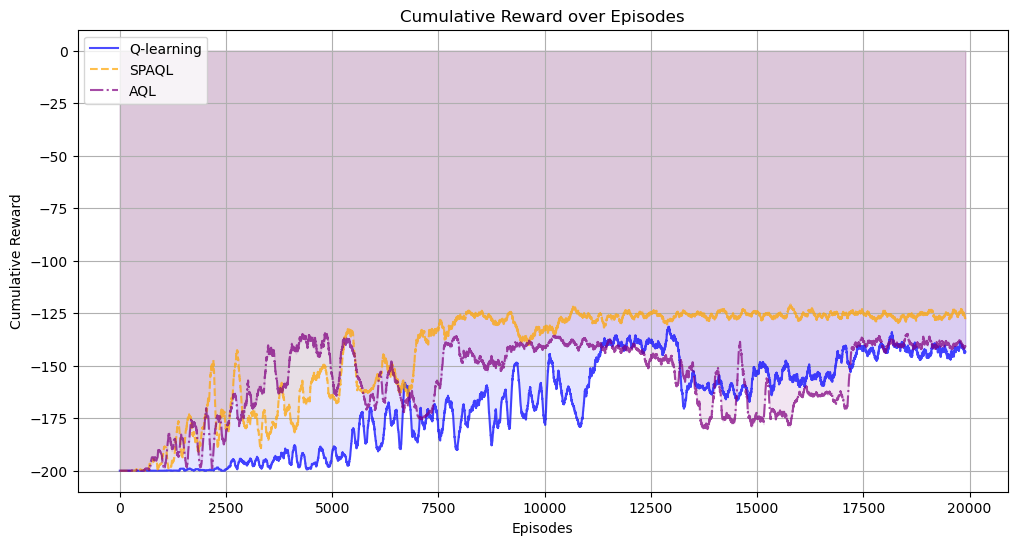

In [11]:
# Smoothing rewards with moving average
window_size = 100
smoothed_qlearning = moving_average(reward_list_qlearning, window_size)
smoothed_spaql = moving_average(reward_list_spaql, window_size)
smoothed_aql = moving_average(reward_list_aql, window_size)

# Plotting the rewards
plt.figure(figsize=(12, 6))

# Plot Q-learning rewards
plt.plot(smoothed_qlearning, label='Q-learning', color='blue', linestyle='-', alpha=0.7)
plt.fill_between(range(len(smoothed_qlearning)), smoothed_qlearning, color='blue', alpha=0.1)

# Plot SPAQL rewards
plt.plot(smoothed_spaql, label='SPAQL', color='orange', linestyle='--', alpha=0.7)
plt.fill_between(range(len(smoothed_spaql)), smoothed_spaql, color='orange', alpha=0.1)

# Plot AQL rewards
plt.plot(smoothed_aql, label='AQL', color='purple', linestyle='-.', alpha=0.7)
plt.fill_between(range(len(smoothed_aql)), smoothed_aql, color='purple', alpha=0.1)

plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Episodes')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

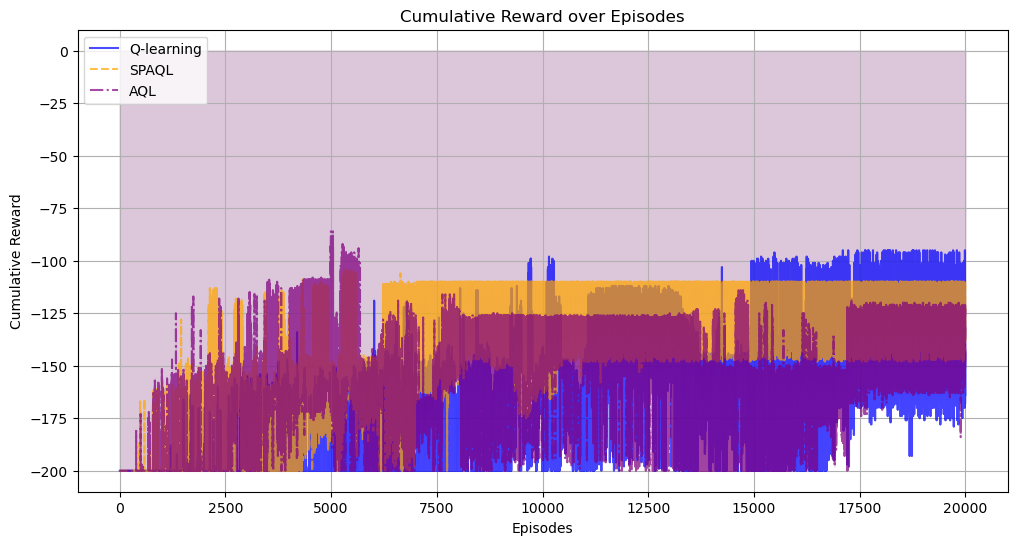

In [12]:
# Plotting the rewards
plt.figure(figsize=(12, 6))

# Plot Q-learning rewards
plt.plot(reward_list_qlearning, label='Q-learning', color='blue', linestyle='-', alpha=0.7)
plt.fill_between(range(len(reward_list_qlearning)), reward_list_qlearning, color='blue', alpha=0.1)

# Plot SPAQL rewards
plt.plot(reward_list_spaql, label='SPAQL', color='orange', linestyle='--', alpha=0.7)
plt.fill_between(range(len(reward_list_spaql)), reward_list_spaql, color='orange', alpha=0.1)

# Plot AQL rewards
plt.plot(reward_list_aql, label='AQL', color='purple', linestyle='-.', alpha=0.7)
plt.fill_between(range(len(reward_list_aql)), reward_list_aql, color='purple', alpha=0.1)

plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Episodes')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()